## [教學目標]
學習 sklearn 中，各種評估指標的使用與意義

## [範例重點]
注意觀察各指標的數值範圍，以及輸入函數中的資料格式

In [1]:
from sklearn import metrics, datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import numpy as np
%matplotlib inline

## 回歸問題
常見的評估指標有
- MAE
- MSE
- R-square

我們隨機生成(X, y)資料，然後使用線性回歸模型做預測，再使用 MAE, MSE, R-square 評估

In [2]:
X, y = datasets.make_regression(n_features=1, random_state=42, noise=4) # 生成資料
model = LinearRegression() # 建立回歸模型
model.fit(X, y) # 將資料放進模型訓練
prediction = model.predict(X) # 進行預測
mae = metrics.mean_absolute_error(prediction, y) # 使用 MAE 評估
mse = metrics.mean_squared_error(prediction, y) # 使用 MSE 評估
r2 = metrics.r2_score(prediction, y) # 使用 r-square 評估
print("MAE: ", mae)
print("MSE: ", mse)
print("R-square: ", r2)

MAE:  2.841797252565566
MSE:  12.48868006739824
R-square:  0.9916581036260311


## 分類問題
常見的評估指標有
- AUC
- F1-Score (Precision, Recall)

In [3]:
cancer = datasets.load_breast_cancer() # 我們使用 sklearn 內含的乳癌資料集
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=50, random_state=0)

In [4]:
print(y_test) # 測試集中的 label

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0]


In [5]:
y_pred = np.random.random((50,)) # 我們先隨機生成 50 筆預測值，範圍都在 0~1 之間，代表機率值

In [6]:
print(y_pred)

[0.12373908 0.46808639 0.30303499 0.34972323 0.81098895 0.58737497
 0.45465258 0.13513039 0.58135574 0.18515241 0.4463779  0.64345481
 0.31908461 0.68311884 0.46789523 0.24393314 0.13075183 0.92087414
 0.7391171  0.78441184 0.60038069 0.98497148 0.66298558 0.85737023
 0.4364994  0.54024534 0.0258034  0.80837082 0.45324609 0.77078845
 0.80251406 0.69433439 0.2401164  0.13111745 0.78020145 0.45287605
 0.92546659 0.89417038 0.13469343 0.38519899 0.57132904 0.88390717
 0.53501013 0.40113016 0.02763035 0.55343927 0.84771055 0.2221056
 0.37485172 0.62710854]


### AUC  (機率)

In [7]:
auc = metrics.roc_auc_score(y_test, y_pred) # 使用 roc_auc_score 來評估。 **這邊特別注意 y_pred 必須要放機率值進去!**
print("AUC: ", auc) # 得到結果約 0.5，與亂猜的結果相近，因為我們的預測值是用隨機生成的

AUC:  0.3820033955857386


## F1-Score  (分類類別)

In [8]:
threshold = 0.5 
y_pred_binarized = np.where(y_pred>threshold, 1, 0) # 使用 np.where 函數, 將 y_pred > 0.5 的值變為 1，小於 0.5 的為 0
f1 = metrics.f1_score(y_test, y_pred_binarized) # 使用 F1-Score 評估
precision = metrics.precision_score(y_test, y_pred_binarized) # 使用 Precision 評估
recall  = metrics.recall_score(y_test, y_pred_binarized) # 使用 recall 評估
print("F1-Score: ", f1) 
print("Precision: ", precision)
print("Recall: ", recall)

F1-Score:  0.45614035087719296
Precision:  0.5
Recall:  0.41935483870967744


## [Confusion Matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
plt.style.use('seaborn')

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[ 6 13]
 [18 13]]
Normalized confusion matrix
[[0.31578947 0.68421053]
 [0.58064516 0.41935484]]


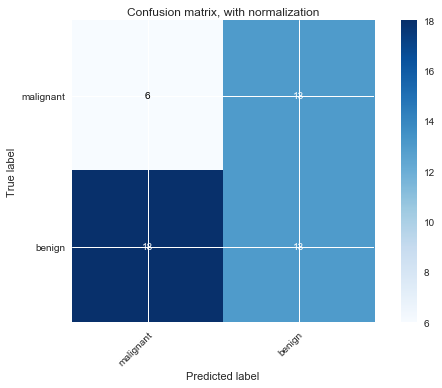

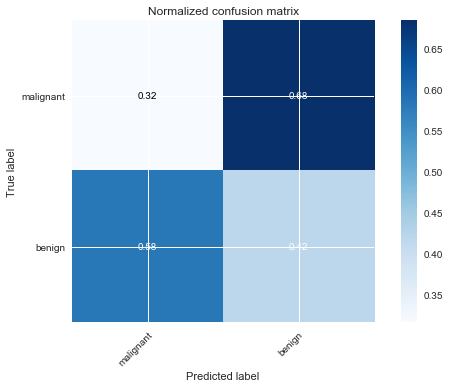

In [10]:
class_names = cancer.target_names

plot_confusion_matrix(y_test, y_pred_binarized, classes=class_names,
                      title='Confusion matrix, with normalization')

plot_confusion_matrix(y_test, y_pred_binarized, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

## [作業重點]
了解 F1-score 的公式意義，並試著理解程式碼

## 練習時間
### F1-Score 其實是 F-Score 中的 β 值為 1 的特例，代表 Precision 與 Recall 的權重相同
### F-Score 中的 β 值 是用來調整Precision 與 Recall的權重
### 如果 β  > 1 代表Recall有較高權重(重視)  ;  反之 β  < 1 則重視Precision

請參考 F1-score 的[公式](https://en.wikipedia.org/wiki/F1_score) 或 [原始碼](https://github.com/scikit-learn/scikit-learn/blob/bac89c2/sklearn/metrics/classification.py#L620) 下圖為 F2-score 公式圖，試著寫出 F2-Score 的計算函數


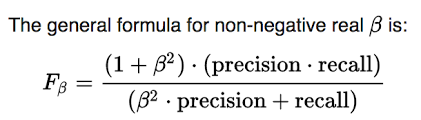

HINT: 可使用 slearn.metrics 中的 precision, recall 函數幫忙

In [11]:
import numpy as np
y_pred = np.random.randint(2, size=100)  # 生成 100 個隨機的 0 / 1 prediction
y_true = np.random.randint(2, size=100)  # 生成 100 個隨機的 0 / 1 ground truth

In [12]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0])

In [13]:
from sklearn import metrics

precision = metrics.precision_score(y_true, y_pred)
recall = metrics.recall_score(y_true, y_pred)
beta = 2
Fbeta_score = ((1+beta**2) * (precision*recall)) / (beta**2 * precision + recall)
print("F2 Score (function): ", metrics.fbeta_score(y_true, y_pred, beta=2))
print("F2 Score (handwriting): ", Fbeta_score)

F2 Score (function):  0.49019607843137253
F2 Score (handwriting):  0.4901960784313726
